# 🍎 Obstklassifikation - Vorhersage mit trainiertem Modell

Dieses Notebook lädt ein bereits trainiertes Modell und verwendet es für Vorhersagen.

**Vorteile:**
- ⚡ Kein erneutes Training nötig
- 🚀 Schnelle Vorhersagen
- 💾 Nutzt gespeicherte Modelle aus `model_output/`

**Verfügbare Modelle:**
- `best_fruit_classifier_cnn.keras` - Bestes Custom CNN Modell
- `label_mapping_cnn.json` - Zuordnung der Klassen

## 1. Bibliotheken importieren

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array

print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU verfügbar: {tf.config.list_physical_devices('GPU')}")

TensorFlow Version: 2.20.0
GPU verfügbar: []


## 2. Trainiertes Modell laden

In [6]:
# Pfade definieren
MODEL_PATH = 'model_output/best_fruit_classifier_cnn.keras'
LABEL_MAPPING_PATH = 'model_output/label_mapping_cnn.json'

# Modell laden
print("Lade trainiertes Modell...")
model = tf.keras.models.load_model(MODEL_PATH)
print(f"✓ Modell geladen von: {MODEL_PATH}")

# Label-Mapping laden
with open(LABEL_MAPPING_PATH, 'r') as f:
    label_mapping = json.load(f)

# Konvertiere String-Keys zu Integer
label_map = {int(k): v for k, v in label_mapping.items()}
print(f"✓ Label-Mapping geladen: {len(label_map)} Klassen")
print(f"\nKlassen: {list(label_map.values())}")

# Modell-Zusammenfassung
print("\n" + "="*60)
print("MODELL-ÜBERSICHT")
print("="*60)
model.summary()

Lade trainiertes Modell...
✓ Modell geladen von: model_output/best_fruit_classifier_cnn.keras
✓ Label-Mapping geladen: 9 Klassen

Klassen: ['Apple', 'Banana', 'Cherry', 'Kiwi', 'Lemon', 'Orange', 'Peach', 'Strawberry', 'Tomato']

MODELL-ÜBERSICHT


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,326,269 (16.50 MB)

 Trainable params: 1,440,937 (5.50 MB)

 Non-trainable params: 3,456 (13.50 KB)

 Optimizer params: 2,881,876 (10.99 MB)

## 3. Vorhersage-Funktion definieren

In [7]:
def predict_image(model, img_path, label_map, target_size=(100, 100)):
    """
    Macht eine Vorhersage für ein einzelnes Bild.
    
    Args:
        model: Trainiertes Keras-Modell
        img_path: Pfad zum Bild
        label_map: Dictionary mit Index -> Klassenname
        target_size: Zielgröße für das Bild (100x100 für Fruits-360)
    
    Returns:
        predicted_class: Name der vorhergesagten Klasse
        confidence: Konfidenz der Vorhersage (0-100%)
        all_probabilities: Wahrscheinlichkeiten für alle Klassen
    """
    # Bild laden und vorbereiten
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalisierung
    img_array = np.expand_dims(img_array, axis=0)  # Batch-Dimension hinzufügen
    
    # Vorhersage
    predictions = model.predict(img_array, verbose=0)
    predicted_index = np.argmax(predictions[0])
    confidence = predictions[0][predicted_index] * 100
    
    predicted_class = label_map[predicted_index]
    
    # Alle Wahrscheinlichkeiten
    all_probs = {label_map[i]: predictions[0][i] * 100 for i in range(len(label_map))}
    
    return predicted_class, confidence, all_probs, img


def display_prediction(img_path, predicted_class, confidence, all_probs, img):
    """
    Zeigt das Bild mit Vorhersage-Ergebnissen an.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bild anzeigen
    ax1.imshow(img)
    ax1.axis('off')
    ax1.set_title(f'Vorhersage: {predicted_class}\nKonfidenz: {confidence:.2f}%', 
                  fontsize=14, fontweight='bold')
    
    # Wahrscheinlichkeiten als Balkendiagramm
    classes = list(all_probs.keys())
    probabilities = list(all_probs.values())
    colors = ['green' if c == predicted_class else 'lightblue' for c in classes]
    
    ax2.barh(classes, probabilities, color=colors)
    ax2.set_xlabel('Wahrscheinlichkeit (%)', fontsize=12)
    ax2.set_title('Vorhersage-Wahrscheinlichkeiten', fontsize=14, fontweight='bold')
    ax2.set_xlim(0, 100)
    
    # Werte an den Balken anzeigen
    for i, (cls, prob) in enumerate(zip(classes, probabilities)):
        ax2.text(prob + 1, i, f'{prob:.1f}%', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📁 Bild: {os.path.basename(img_path)}")
    print(f"🎯 Vorhersage: {predicted_class}")
    print(f"✓ Konfidenz: {confidence:.2f}%")

print("✓ Vorhersage-Funktionen definiert")

✓ Vorhersage-Funktionen definiert


## 4. Einzelne Vorhersage - Zufälliges Bild

Wählt zufällig eine Obstsorte und ein Bild aus dem Test-Ordner.

🎲 Zufällig ausgewählt: Strawberry
📁 Bild: 327_100.jpg



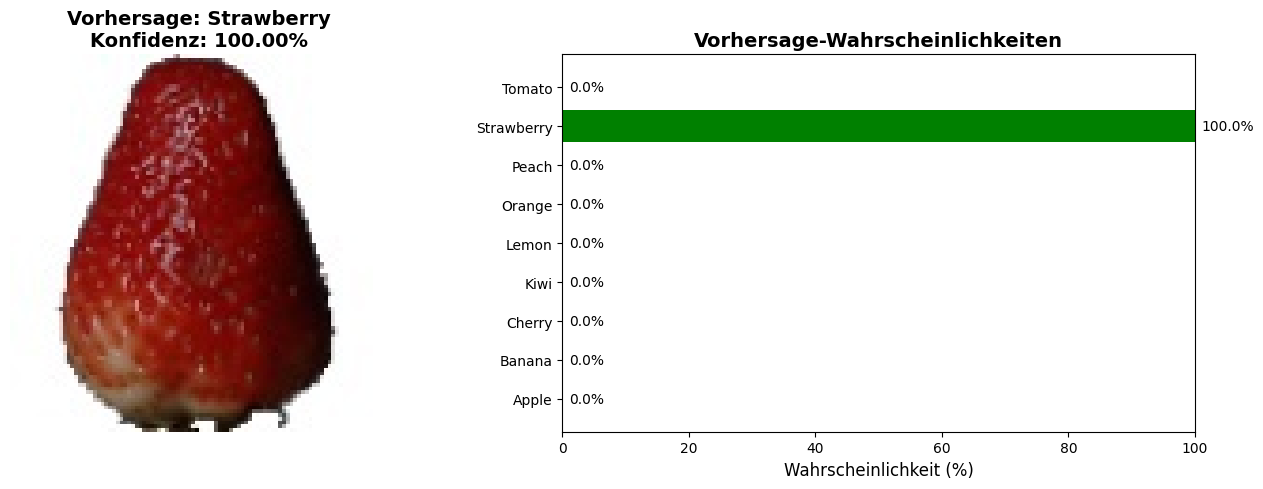


📁 Bild: 327_100.jpg
🎯 Vorhersage: Strawberry
✓ Konfidenz: 100.00%


In [8]:
import random
import glob

# Wähle zufällig eine Obstsorte aus dem Test-Ordner
test_base_folder = r'C:\source\mkufka\ML\Bilder\Test'

if os.path.exists(test_base_folder):
    # Alle Unterordner (Obstsorten) finden
    fruit_folders = [f for f in os.listdir(test_base_folder) 
                     if os.path.isdir(os.path.join(test_base_folder, f))]
    
    if fruit_folders:
        # Zufällige Obstsorte wählen
        random_fruit = random.choice(fruit_folders)
        fruit_folder = os.path.join(test_base_folder, random_fruit)
        
        # Alle Bilder in diesem Ordner finden
        images = glob.glob(os.path.join(fruit_folder, '*.jpg'))
        
        if images:
            # Zufälliges Bild auswählen
            test_image_path = random.choice(images)
            
            print(f"🎲 Zufällig ausgewählt: {random_fruit}")
            print(f"📁 Bild: {os.path.basename(test_image_path)}\n")
            
            predicted_class, confidence, all_probs, img = predict_image(
                model, test_image_path, label_map
            )
            display_prediction(test_image_path, predicted_class, confidence, all_probs, img)
        else:
            print(f"❌ Keine Bilder in {fruit_folder} gefunden")
    else:
        print(f"❌ Keine Unterordner in {test_base_folder} gefunden")
else:
    print(f"❌ Ordner nicht gefunden: {test_base_folder}")

## 5. Mehrere Bilder vorhersagen - Ein Bild pro Obstsorte

Wählt aus jeder Obstsorte ein zufälliges Bild und zeigt die Vorhersagen im Vergleich.

🎲 Zufällige Auswahl aus 9 Obstsorten:

✓ Apple        → Apple        (100.0%)
✓ Banana       → Banana       (100.0%)
✓ Cherry       → Cherry       (100.0%)
✓ Kiwi         → Kiwi         (100.0%)
✓ Lemon        → Lemon        (100.0%)
✓ Orange       → Orange       (100.0%)
✓ Peach        → Peach        (100.0%)
✓ Strawberry   → Strawberry   (100.0%)
✓ Tomato       → Tomato       (100.0%)


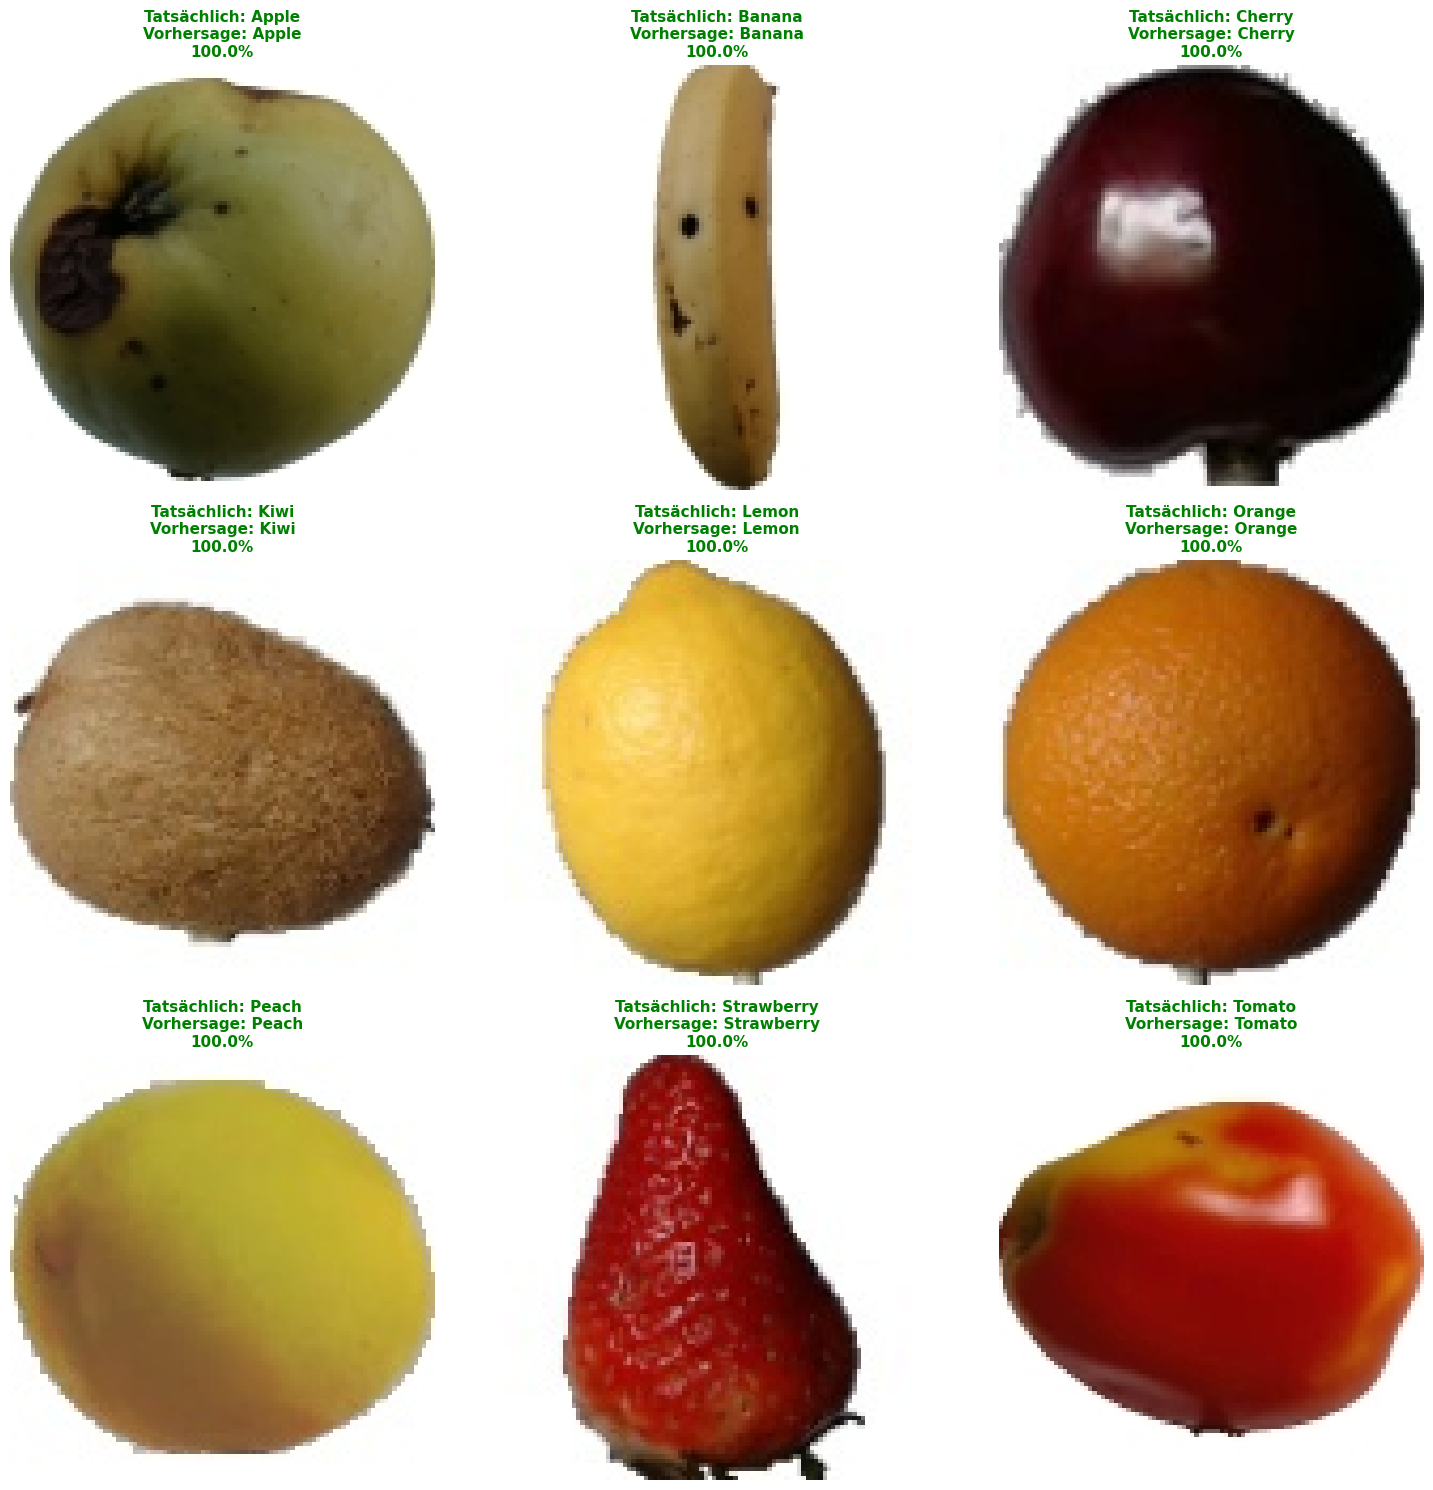


📊 Genauigkeit: 9/9 (100.0%)


In [9]:
# Wähle aus jeder Obstsorte ein zufälliges Bild
test_base_folder = r'C:\source\mkufka\ML\Bilder\Test'

if os.path.exists(test_base_folder):
    # Alle Unterordner (Obstsorten) finden
    fruit_folders = [f for f in os.listdir(test_base_folder) 
                     if os.path.isdir(os.path.join(test_base_folder, f))]
    
    if fruit_folders:
        # Sortiere für konsistente Reihenfolge
        fruit_folders.sort()
        
        # Wähle aus jedem Ordner ein zufälliges Bild
        selected_images = []
        actual_fruits = []
        
        for fruit in fruit_folders:
            fruit_folder = os.path.join(test_base_folder, fruit)
            images = glob.glob(os.path.join(fruit_folder, '*.jpg'))
            
            if images:
                random_image = random.choice(images)
                selected_images.append(random_image)
                actual_fruits.append(fruit)
        
        if selected_images:
            # Grid für alle Obstsorten (3x3 für 9 Klassen)
            n_images = len(selected_images)
            cols = 3
            rows = (n_images + cols - 1) // cols
            
            fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
            if n_images == 1:
                axes = [axes]
            else:
                axes = axes.flatten()
            
            print(f"🎲 Zufällige Auswahl aus {n_images} Obstsorten:\n")
            
            for idx, (img_path, actual_fruit) in enumerate(zip(selected_images, actual_fruits)):
                predicted_class, confidence, all_probs, img = predict_image(
                    model, img_path, label_map
                )
                
                # Prüfe ob Vorhersage korrekt ist
                is_correct = predicted_class.lower() == actual_fruit.lower()
                color = 'green' if is_correct else 'red'
                
                axes[idx].imshow(img)
                axes[idx].axis('off')
                title = f'Tatsächlich: {actual_fruit}\nVorhersage: {predicted_class}\n{confidence:.1f}%'
                axes[idx].set_title(title, fontsize=11, fontweight='bold', color=color)
                
                # Status ausgeben
                status = '✓' if is_correct else '✗'
                print(f"{status} {actual_fruit:12s} → {predicted_class:12s} ({confidence:.1f}%)")
            
            # Leere Subplots ausblenden
            for idx in range(n_images, len(axes)):
                axes[idx].axis('off')
            
            plt.tight_layout()
            plt.show()
            
            # Genauigkeit berechnen
            correct = sum(1 for pred, actual in zip(selected_images, actual_fruits) 
                         if os.path.basename(os.path.dirname(pred)).lower() == 
                            label_map[np.argmax(model.predict(
                                np.expand_dims(img_to_array(load_img(pred, target_size=(100,100)))/255.0, 0), 
                                verbose=0))].lower())
            accuracy = (correct / n_images) * 100
            print(f"\n📊 Genauigkeit: {correct}/{n_images} ({accuracy:.1f}%)")
        else:
            print("❌ Keine Bilder gefunden")
    else:
        print(f"❌ Keine Unterordner in {test_base_folder} gefunden")
else:
    print(f"❌ Ordner nicht gefunden: {test_base_folder}")

## 6. Eigenes Bild hochladen und vorhersagen

Laden Sie Ihr eigenes Obstbild und lassen Sie es klassifizieren.

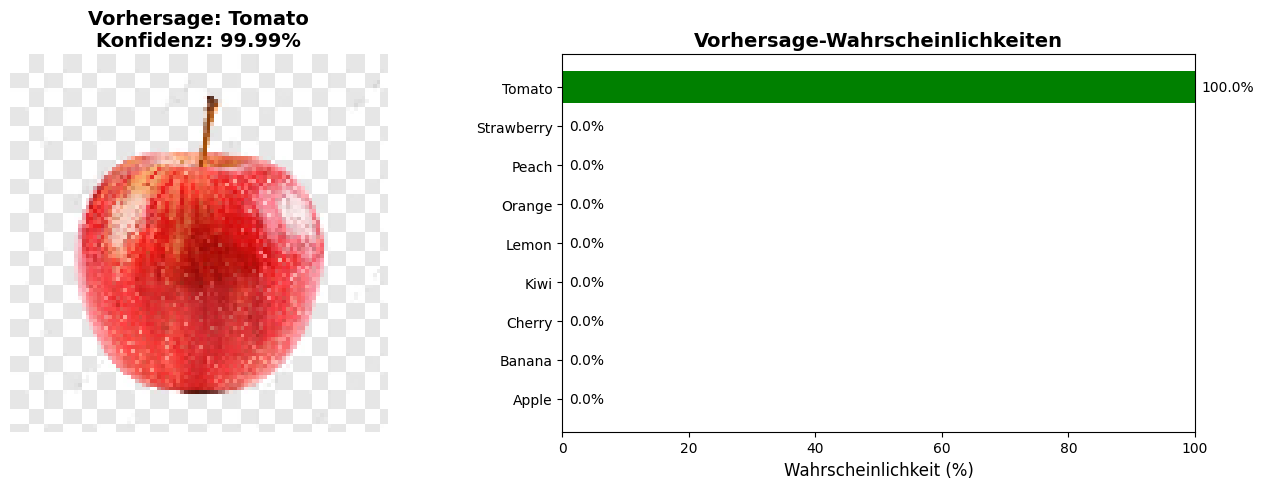


📁 Bild: apple.jpg
🎯 Vorhersage: Tomato
✓ Konfidenz: 99.99%


In [ ]:
# Geben Sie hier den Pfad zu Ihrem eigenen Bild an
custom_image_path = r'C:\Bilder\apple100.jpg'

if os.path.exists(custom_image_path):
    predicted_class, confidence, all_probs, img = predict_image(
        model, custom_image_path, label_map
    )
    display_prediction(custom_image_path, predicted_class, confidence, all_probs, img)
else:
    print(f"ℹ️ Bild nicht gefunden: {custom_image_path}")
    print("")
    print("So verwenden Sie diese Zelle:")
    print("1. Legen Sie ein Obstbild in den Projektordner")
    print("2. Ändern Sie 'custom_image_path' zum Dateinamen")
    print("3. Führen Sie die Zelle erneut aus")
    print("")
    print("Beispiel: custom_image_path = 'mein_apfel.jpg'")

## 7. Modell-Informationen

Zeigt Details über das geladene Modell.

In [10]:
print("="*60)
print("MODELL-INFORMATIONEN")
print("="*60)
print(f"Modell-Pfad: {MODEL_PATH}")
print(f"Anzahl Klassen: {len(label_map)}")
print(f"Klassen: {', '.join(label_map.values())}")
print(f"")
print(f"Input Shape: {model.input_shape}")
print(f"Output Shape: {model.output_shape}")
print(f"Anzahl Parameter: {model.count_params():,}")
print(f"Anzahl Layer: {len(model.layers)}")
print("="*60)

MODELL-INFORMATIONEN
Modell-Pfad: model_output/best_fruit_classifier_cnn.keras
Anzahl Klassen: 9
Klassen: Apple, Banana, Cherry, Kiwi, Lemon, Orange, Peach, Strawberry, Tomato

Input Shape: (None, 100, 100, 3)
Output Shape: (None, 9)
Anzahl Parameter: 1,444,393
Anzahl Layer: 32


## 💡 Tipps zur Verwendung

### Modell wechseln
Falls Sie ein anderes trainiertes Modell verwenden möchten:
```python
MODEL_PATH = 'model_output/custom_cnn_fruit_classifier.keras'
LABEL_MAPPING_PATH = 'model_output/label_mapping.json'
```

### Beste Ergebnisse erzielen
- ✅ Verwenden Sie klare, gut beleuchtete Bilder
- ✅ Das Obst sollte den Großteil des Bildes ausfüllen
- ✅ Einfarbiger Hintergrund funktioniert am besten
- ⚠️ Das Modell wurde auf Fruits-360 trainiert (weißer Hintergrund)

### Verfügbare Obstklassen
Das Modell kann folgende Früchte erkennen:
- 🍎 Apple (Apfel)
- 🍌 Banana (Banane)
- 🍒 Cherry (Kirsche)
- 🥝 Kiwi
- 🍋 Lemon (Zitrone)
- 🍊 Orange
- 🍑 Peach (Pfirsich)
- 🍓 Strawberry (Erdbeere)
- 🍅 Tomato (Tomate)